# Wine Quality Predection

### By Madhu Patil

## Statsly Analytics

## Import Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Import Dataset

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* We have 1599 rows & 1599 non-null values
* All the attributes have float datatype except the quality having the int datatype

## Checking for Null Values

In [6]:
df.isna().sum()   #Dataset has no null values. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Checking for Duplicates

In [7]:
df.duplicated().sum()

240

There are 240 duplicate values

In [8]:
#droping duplicate values
df=df.drop_duplicates(keep='first')

In [9]:
df.shape

(1359, 12)

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

* Alcohol value veries from 8.4 to 14.9 with mean value: 10.4 
* PH value varies from 2.7 to 4.0 with mean value: 3.30

In [11]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

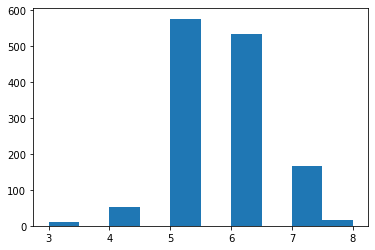

In [12]:
plt.hist(data=df, x='quality')

In [13]:
#helper function to divide the quality into 2 types
def helper(row):
    if row.quality < 6:
        return 0
    else:
        return 1
df['quality']=df.apply(helper,axis=1)

In [14]:
df.quality.value_counts()

1    719
0    640
Name: quality, dtype: int64

## Univeriate Analysis

<AxesSubplot:ylabel='quality'>

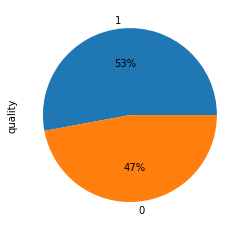

In [15]:
df['quality'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

53% being the best quality wine while, there are 47% with low quality wine 

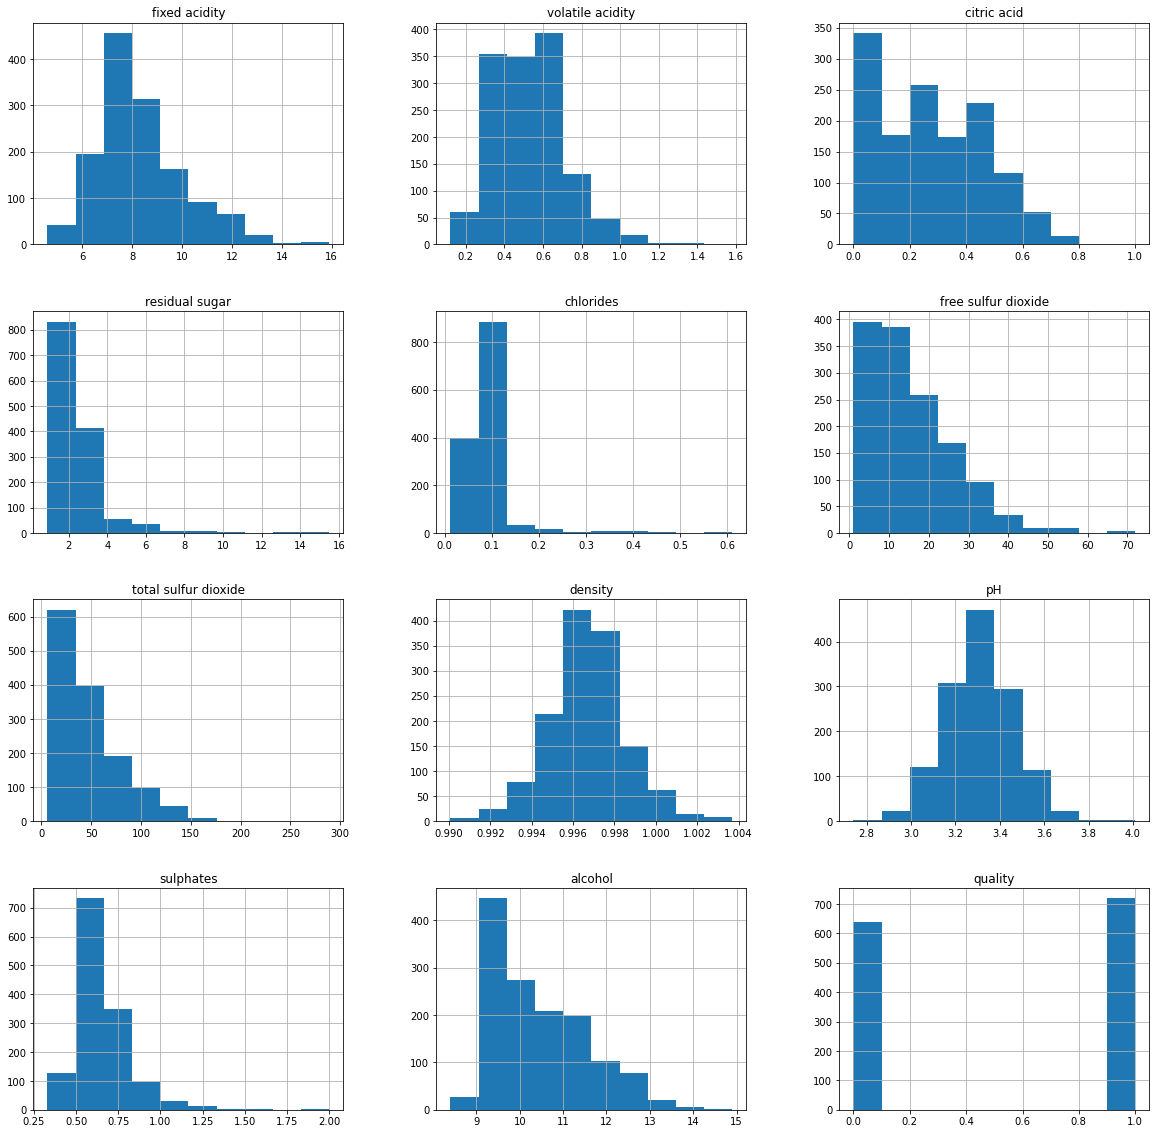

In [16]:
df.hist(figsize=(20,20))
plt.show()

## Biveriate Analysis

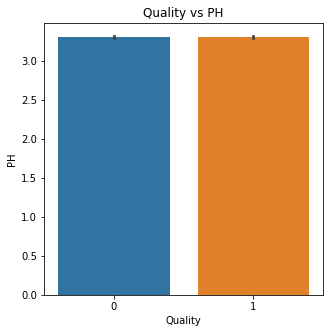

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="pH",data=df)
plt.title("Quality vs PH")
plt.xlabel("Quality")
plt.ylabel("PH")
plt.show()

pH is equal in both the quality of wine 

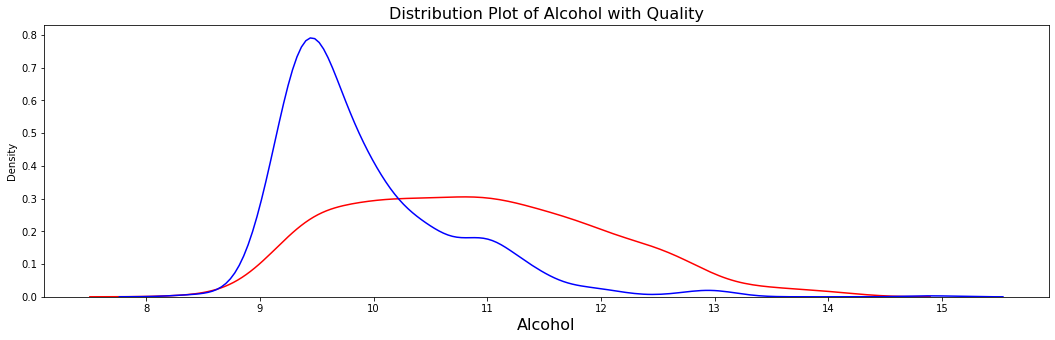

In [18]:
plt.figure(figsize=(18,5))

sns.distplot(df['alcohol'][df['quality']==1],hist=False,color='red')

sns.distplot(df['alcohol'][df['quality']==0],hist=False,color='blue')

plt.xlabel('Alcohol', fontsize = 16)
plt.title('Distribution Plot of Alcohol with Quality', fontsize = 16)
plt.show()

* In Best quality of wine, alcohol ranges from 9 to 13
* In Low quality of wine, alcohol ranges from 9 to 11

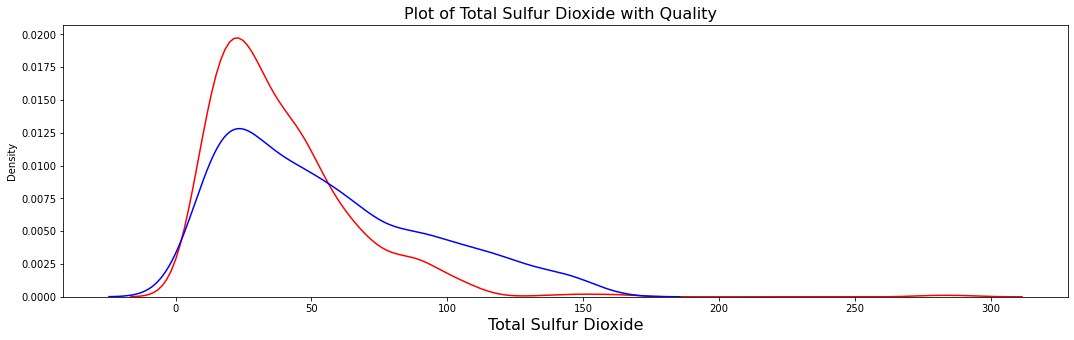

In [19]:
plt.figure(figsize=(18,5))

sns.distplot(df['total sulfur dioxide'][df['quality']==1],hist=False,color='red')

sns.distplot(df['total sulfur dioxide'][df['quality']==0],hist=False,color='blue')

plt.xlabel('Total Sulfur Dioxide', fontsize = 16)
plt.title('Plot of Total Sulfur Dioxide with Quality  ', fontsize = 16)
plt.show()

* In Best quality of wine, total sulfur dioxide ranges from 0 to 50
* In Low quality of wine, total sulfur dioxide ranges from 0 to 100

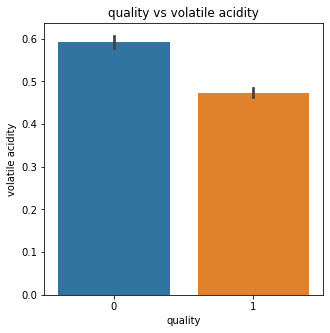

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.title("quality vs volatile acidity")
plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.show()

In best quality wine content of Volatile Acidity is low as compared to low quality of wine

## Multiveriate Analysis

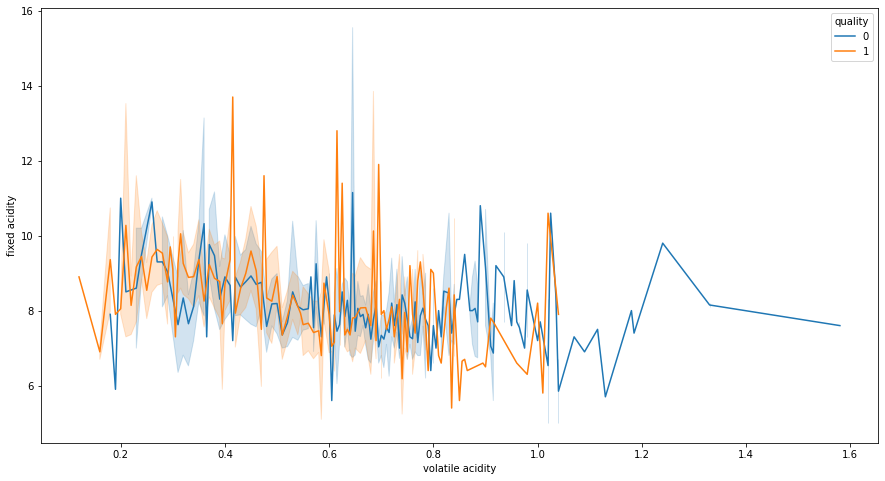

In [21]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="volatile acidity",y="fixed acidity",hue="quality",data=df)
plt.show()

* If content of Volatile Acidity increases, It decreases the Quality of wine.
* Best Quality of wine should have more content of Fixed Acidity and less of Volatile Acidity

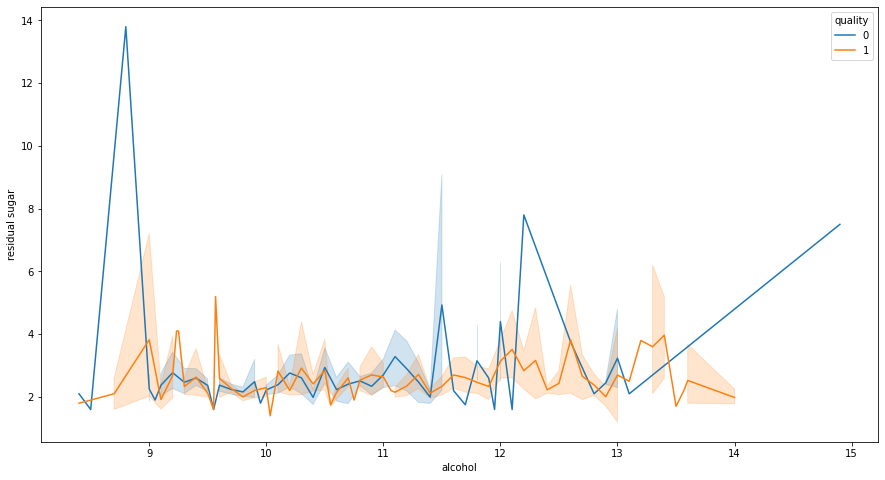

In [22]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="alcohol",y="residual sugar",hue="quality",data=df)
plt.show()

* If content of Residual Sugar increases, It decreases the Quality of wine.
* Best Quality of wine should have less content of Residual Sugar and Alcohol

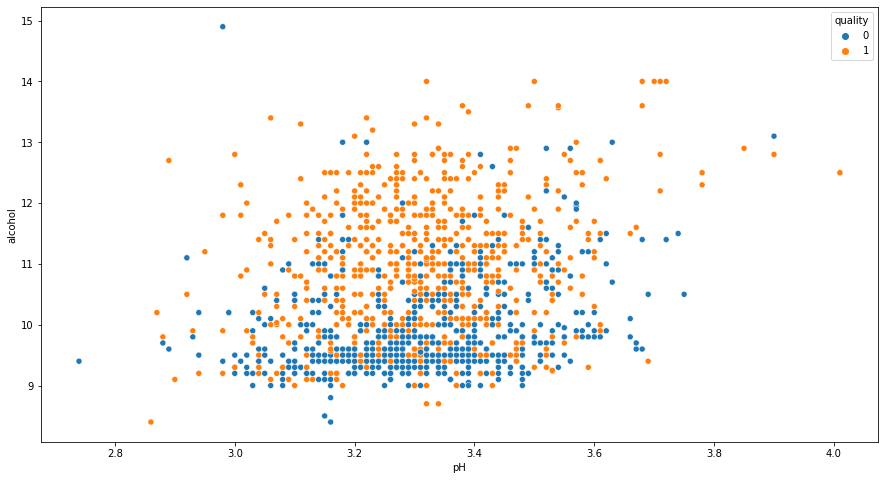

In [23]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="pH",y="alcohol",hue="quality",data=df)
plt.show()

Alcohol content is more as compared to PH in the Best quality of wine

### Handling Outliers

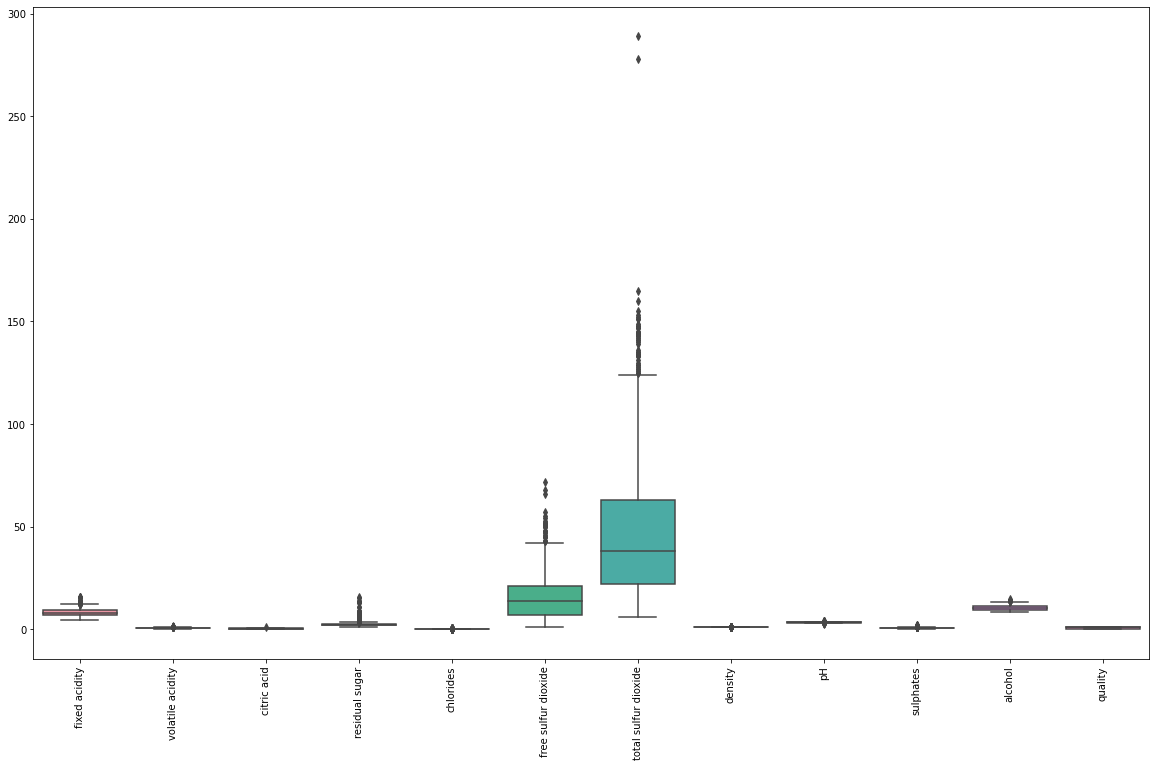

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

fixed acidity


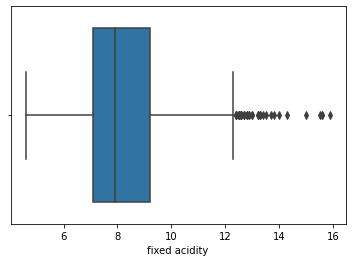

volatile acidity


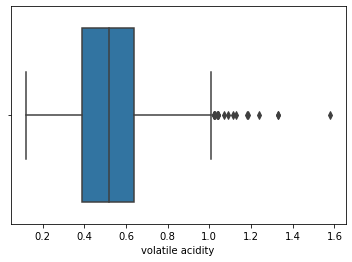

citric acid


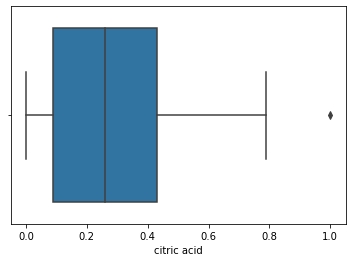

residual sugar


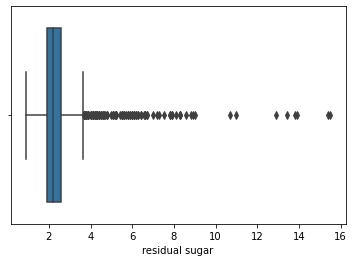

chlorides


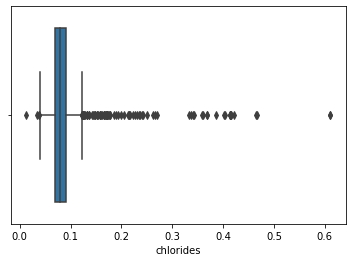

free sulfur dioxide


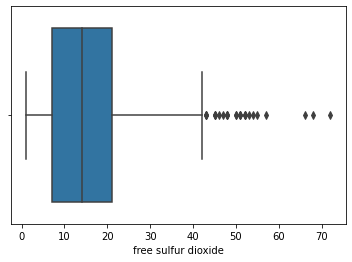

total sulfur dioxide


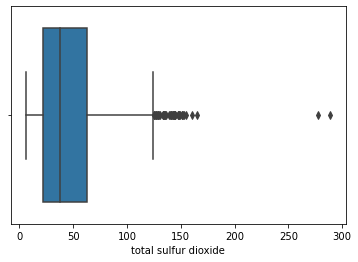

density


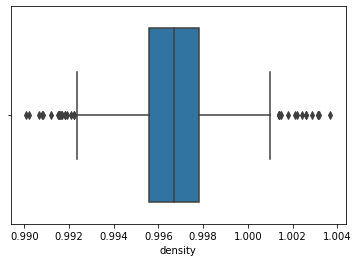

pH


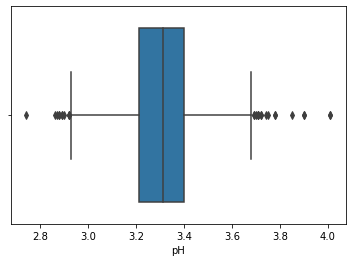

sulphates


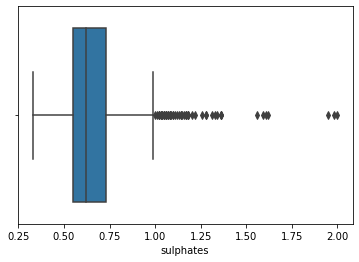

alcohol


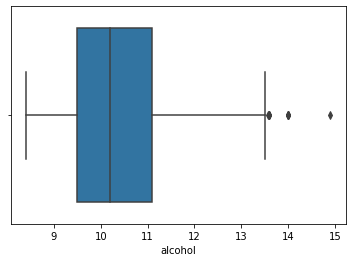

quality


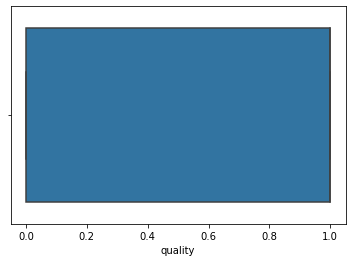

In [25]:
for col in df:
    print(col)
    
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

In [26]:
df[(df["fixed acidity"]>14)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
243           15.0             0.210         0.44             2.2      0.075   
442           15.6             0.685         0.76             3.7      0.100   
544           14.3             0.310         0.74             1.8      0.075   
554           15.5             0.645         0.49             4.2      0.095   
557           15.6             0.645         0.49             4.2      0.095   
652           15.9             0.360         0.65             7.5      0.096   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
243                 10.0                  24.0  1.00005  3.07       0.84   
442                  6.0                  43.0  1.00320  2.95       0.68   
544                  6.0                  15.0  1.00080  2.86       0.79   
554                 10.0                  23.0  1.00315  2.92       0.74   
557                 10.0                  23.0  1.00315  2.92       0.74   
652                 22.0                  71.0  0.99760  2.98       0.84   

     alcohol  quality  
243      9.2        1  
442     11.2        1  
544      8.4        1  
554     11.1        0  
557     11.1        0  
652     14.9        0

In [27]:
df.drop([243,442,544,554,447,652], inplace=True)

In [28]:
df[(df["residual sugar"]>6)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36            6.10      0.071   
33              6.9             0.605         0.12           10.70      0.073   
163             7.4             0.600         0.26            7.30      0.070   
164             7.3             0.590         0.26            7.20      0.070   
274             7.5             0.650         0.18            7.00      0.088   
278            10.3             0.320         0.45            6.40      0.073   
324            10.0             0.490         0.20           11.00      0.071   
378            11.4             0.625         0.66            6.20      0.088   
396             6.6             0.735         0.02            7.90      0.122   
413             9.9             0.400         0.53            6.70      0.097   
415             8.6             0.725         0.24            6.60      0.117   
480            10.6             0.280         0.39           15.50      0.069   
494             6.5             0.390         0.23            8.30      0.051   
501            10.4             0.440         0.73            6.55      0.074   
515             8.5             0.655         0.49            6.10      0.122   
541             9.5             0.460         0.49            6.30      0.064   
595             8.9             0.595         0.41            7.90      0.086   
649             6.7             0.420         0.27            8.60      0.068   
889            10.7             0.900         0.34            6.60      0.112   
911             9.1             0.280         0.46            9.00      0.114   
917             6.8             0.410         0.31            8.80      0.084   
1038            8.7             0.410         0.41            6.20      0.078   
1043            9.5             0.390         0.41            8.90      0.069   
1071            7.5             0.770         0.20            8.10      0.098   
1077            8.6             0.370         0.65            6.40      0.080   
1079            7.9             0.300         0.68            8.30      0.050   
1081            7.9             0.300         0.68            8.30      0.050   
1147           10.0             0.410         0.45            6.20      0.071   
1186            6.6             0.800         0.03            7.80      0.079   
1235            6.0             0.330         0.32           12.90      0.054   
1244            5.9             0.290         0.25           13.40      0.067   
1276            8.5             0.400         0.40            6.30      0.050   
1388            6.6             0.640         0.31            6.10      0.083   
1434           10.2             0.540         0.37           15.40      0.214   
1474            9.9             0.500         0.50           13.80      0.205   
1558            6.9             0.630         0.33            6.70      0.235   
1574            5.6             0.310         0.78           13.90      0.074   
1589            6.6             0.725         0.20            7.80      0.073   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                    17.0                 102.0  0.99780  3.35       0.80   
33                   40.0                  83.0  0.99930  3.45       0.52   
163                  36.0                 121.0  0.99820  3.37       0.49   
164                  35.0                 121.0  0.99810  3.37       0.49   
274                  27.0                  94.0  0.99915  3.38       0.77   
278                   5.0                  13.0  0.99760  3.23       0.82   
324                  13.0                  50.0  1.00150  3.16       0.69   
378                   6.0                  24.0  0.99880  3.11       0.99   
396                  68.0                 124.0  0.99940  3.47       0.53   
413                   6.0                  19.0  0.99860  3.27       0.82   

In [29]:
df.drop([9,33,163,164,274,278,324,378,396,413,415,480,494,501,515,541,595,649,889,911,917,1038,1043,1071,1077,1079,1081,1147,1186,1235,1244,1276,1388,1434,1474,1558,1574,1589], inplace=True)

In [30]:
df[(df["chlorides"]>0.3)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
42              7.5             0.490         0.20             2.6      0.332   
81              7.8             0.430         0.70             1.9      0.464   
83              7.3             0.670         0.26             1.8      0.401   
106             7.8             0.410         0.68             1.7      0.467   
151             9.2             0.520         1.00             3.4      0.610   
169             7.5             0.705         0.24             1.8      0.360   
226             8.9             0.590         0.50             2.0      0.337   
258             7.7             0.410         0.76             1.8      0.611   
281             7.7             0.270         0.68             3.5      0.358   
291            11.0             0.200         0.48             2.0      0.343   
451             8.4             0.370         0.53             1.8      0.413   
692             8.6             0.490         0.51             2.0      0.422   
730             9.5             0.550         0.66             2.3      0.387   
754             7.8             0.480         0.68             1.7      0.415   
1051            8.5             0.460         0.59             1.4      0.414   
1165            8.5             0.440         0.50             1.9      0.369   
1260            8.6             0.635         0.68             1.8      0.403   
1319            9.1             0.760         0.68             1.7      0.414   
1370            8.7             0.780         0.51             1.7      0.415   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
42                    8.0                  14.0  0.99680  3.21       0.90   
81                   22.0                  67.0  0.99740  3.13       1.28   
83                   16.0                  51.0  0.99690  3.16       1.14   
106                  18.0                  69.0  0.99730  3.08       1.31   
151                  32.0                  69.0  0.99960  2.74       2.00   
169                  15.0                  63.0  0.99640  3.00       1.59   
226                  27.0                  81.0  0.99640  3.04       1.61   
258                   8.0                  45.0  0.99680  3.06       1.26   
281                   5.0                  10.0  0.99720  3.25       1.08   
291                   6.0                  18.0  0.99790  3.30       0.71   
451                   9.0                  26.0  0.99790  3.06       1.06   
692                  16.0                  62.0  0.99790  3.03       1.17   
730                  12.0                  37.0  0.99820  3.17       0.67   
754                  14.0                  32.0  0.99656  3.09       1.06   
1051                 16.0                  45.0  0.99702  3.03       1.34   
1165                 15.0                  38.0  0.99634  3.01       1.10   
1260                 19.0                  56.0  0.99632  3.02       1.15   
1319                 18.0                  64.0  0.99652  2.90       1.33   
1370                 12.0                  66.0  0.99623  3.00       1.17   

      alcohol  quality  
17        9.3        0  
19        9.2        1  
42       10.5        1  
81        9.4        0  
83        9.4        0  
106       9.3        0  
151       9.4        0  
169       9.5        0  
226       9.5        1  
258       9.4        0  
281       9.9        1  
291      10.5        0  
451       9.1        1  
692       9.0        0  
730       9.6        0  
754       9.1        1  
1051      9.2        0  
1165      9.4        0  
1260      9.3        0  
1319      9.1        1  
137

In [31]:
df.drop([17,19,42,81,83,106,151,169,226,258,281,291,451,692,730,754,1051,1165,1260,1319,1370], inplace=True)

In [32]:
df[(df["free sulfur dioxide"]>50)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9              0.62         0.18             3.8      0.176   
15              8.9              0.62         0.19             3.9      0.170   
584            11.8              0.33         0.49             3.4      0.093   
925             8.6              0.22         0.36             1.9      0.064   
926             9.4              0.24         0.33             2.3      0.061   
982             7.3              0.52         0.32             2.1      0.070   
1131            5.9              0.19         0.21             1.7      0.045   
1295            6.6              0.63         0.00             4.3      0.093   
1358            7.4              0.64         0.17             5.4      0.168   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
584                  54.0                  80.0  1.00020  3.30       0.76   
925                  53.0                  77.0  0.99604  3.47       0.87   
926                  52.0                  73.0  0.99786  3.47       0.90   
982                  51.0                  70.0  0.99418  3.34       0.82   
1131                 57.0                 135.0  0.99341  3.32       0.44   
1295                 51.0                  77.5  0.99558  3.20       0.45   
1358                 52.0                  98.0  0.99736  3.28       0.50   

      alcohol  quality  
14        9.2        0  
15        9.2        0  
584      10.7        1  
925      11.0        1  
926      10.2        1  
982      12.9        1  
1131      9.5        0  
1295      9.5        0  
1358      9.5        0

In [33]:
df.drop([14,15,584,925,926,982,1131,1295,1358], inplace=True)

In [34]:
df[(df["total sulfur dioxide"]>160)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
354            6.1              0.21          0.4             1.4      0.066   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
354                 40.5                 165.0   0.9912  3.25       0.59   

     alcohol  quality  
354     11.9        1

In [35]:
df.drop(354, inplace=True)

In [36]:
df[(df["density"]>1004) & (df['density']<0.990)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [37]:
df[(df["pH"]>3.8) & (df['pH']<2.8)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [38]:
df[(df["sulphates"]>1.30)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13             7.8             0.610         0.29             1.6      0.114   
86             8.6             0.490         0.28             1.9      0.110   
92             8.6             0.490         0.29             2.0      0.110   
339           12.5             0.280         0.54             2.3      0.082   
614            9.2             0.755         0.18             2.2      0.148   
639            8.9             0.290         0.35             1.9      0.067   
723            7.1             0.310         0.30             2.2      0.053   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                   9.0                  29.0   0.9974  3.26       1.56   
86                  20.0                 136.0   0.9972  2.93       1.95   
92                  19.0                 133.0   0.9972  2.93       1.98   
339                 12.0                  29.0   0.9997  3.11       1.36   
614                 10.0                 103.0   0.9969  2.87       1.36   
639                 25.0                  57.0   0.9970  3.18       1.36   
723                 36.0                 127.0   0.9965  2.94       1.62   

     alcohol  quality  
13       9.1        0  
86       9.9        1  
92       9.8        0  
339      9.8        1  
614     10.2        1  
639     10.3        1  
723      9.5        0

In [39]:
df.drop([13,86,92,339,614,639,723], inplace=True)

<AxesSubplot:>

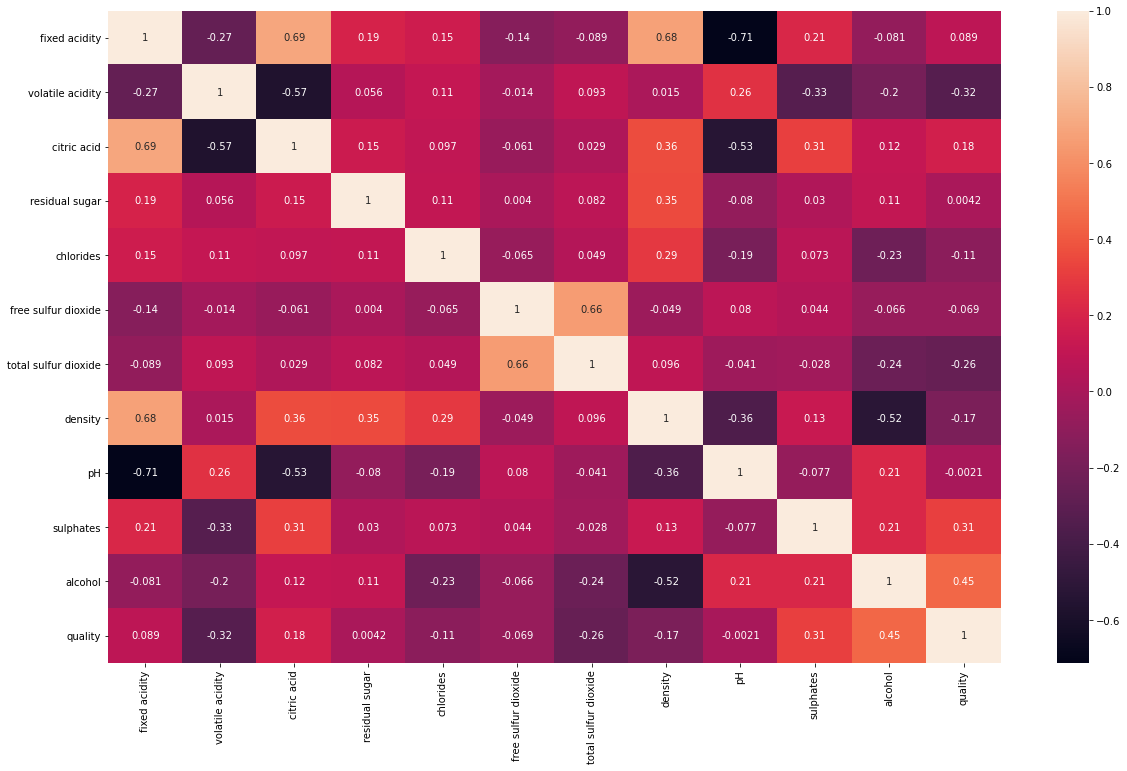

In [40]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

* Among all the other attribute Alcohol is having the higest correlation with the target column(Quality)
* Volatile Acidity is having heigest Negative correlation with the target column

In [41]:
df.corr().style.background_gradient()

* Among all the other attribute Alcohol is having the higest correlation with the target column(Quality)
* Volatile Acidity is having heigest Negative correlation with the target column
* Fixed Acidity and Citric Acid are more corelated as compared to any other column

### Handling Skewness

In [42]:
from scipy.stats import skew

fixed acidity
0.8260064619302733
volatile acidity
0.7523482291183916
citric acid
0.2868624608201274
residual sugar
2.1254650832274993
chlorides
2.984845766350121
free sulfur dioxide
0.9117951106538429
total sulfur dioxide
1.188763588764087
density
-0.07370929233208155
pH
0.3532882191813197
sulphates
1.078855550293471
alcohol
0.8367968088546645
quality
-0.13342040047189166


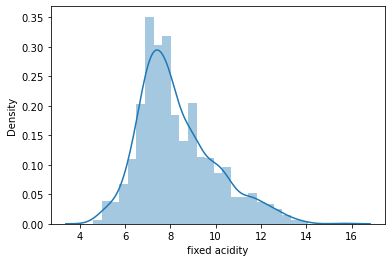

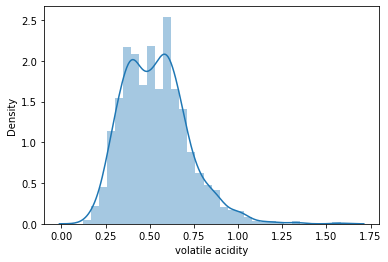

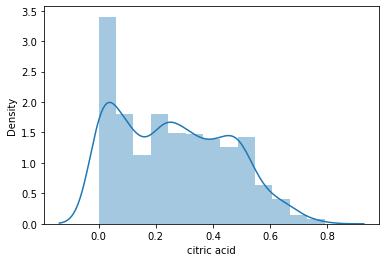

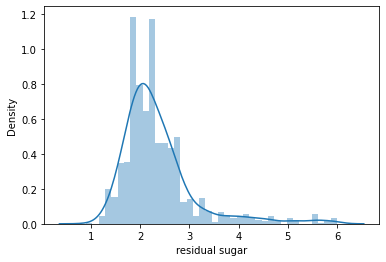

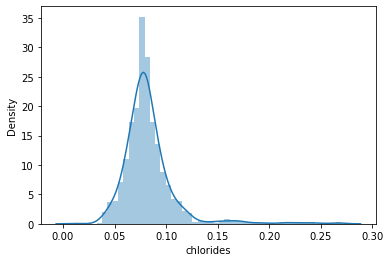

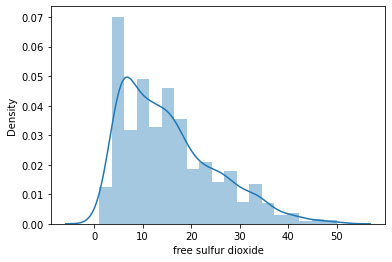

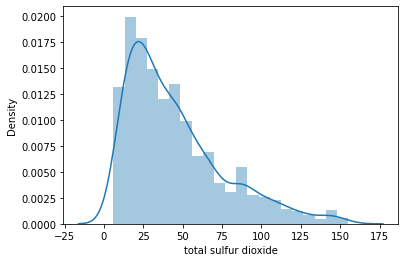

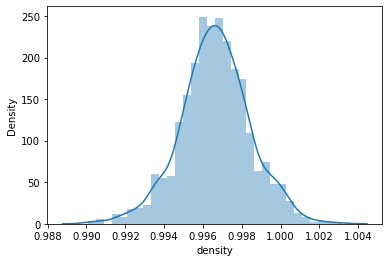

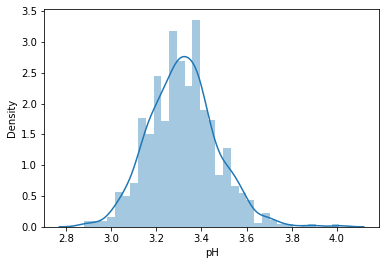

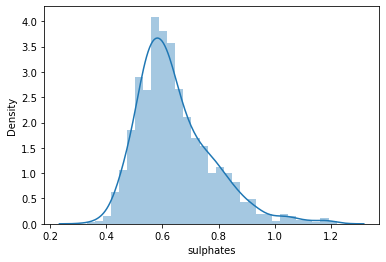

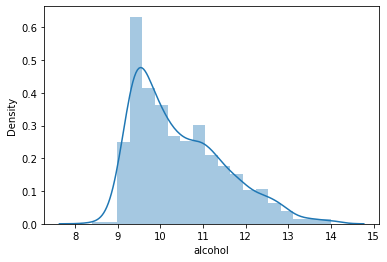

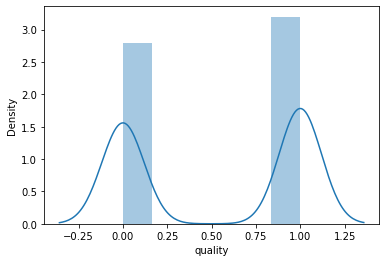

In [43]:
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])

Fixed Acidity, Residual Sugar, Chlorides, Free Sulfur Dioxide and PH are having more Skewness 

In [44]:
#handling Skewness
df["fixed acidity"]=np.sqrt(df["fixed acidity"]) 

In [45]:
df["residual sugar"]=np.sqrt(df["residual sugar"])

In [46]:
df["chlorides"]=np.sqrt(df["chlorides"])

In [47]:
df["free sulfur dioxide"]=np.sqrt(df["free sulfur dioxide"])

In [48]:
df["pH"]=np.sqrt(df["pH"])

In [49]:
for col in df:
    print(col)
    print(skew(df[col]))

fixed acidity
0.563903551157133
volatile acidity
0.7523482291183916
citric acid
0.2868624608201274
residual sugar
1.5121038888067093
chlorides
1.7499786106474056
free sulfur dioxide
0.3431287827922738
total sulfur dioxide
1.188763588764087
density
-0.07370929233208155
pH
0.2631864106893339
sulphates
1.078855550293471
alcohol
0.8367968088546645
quality
-0.13342040047189166


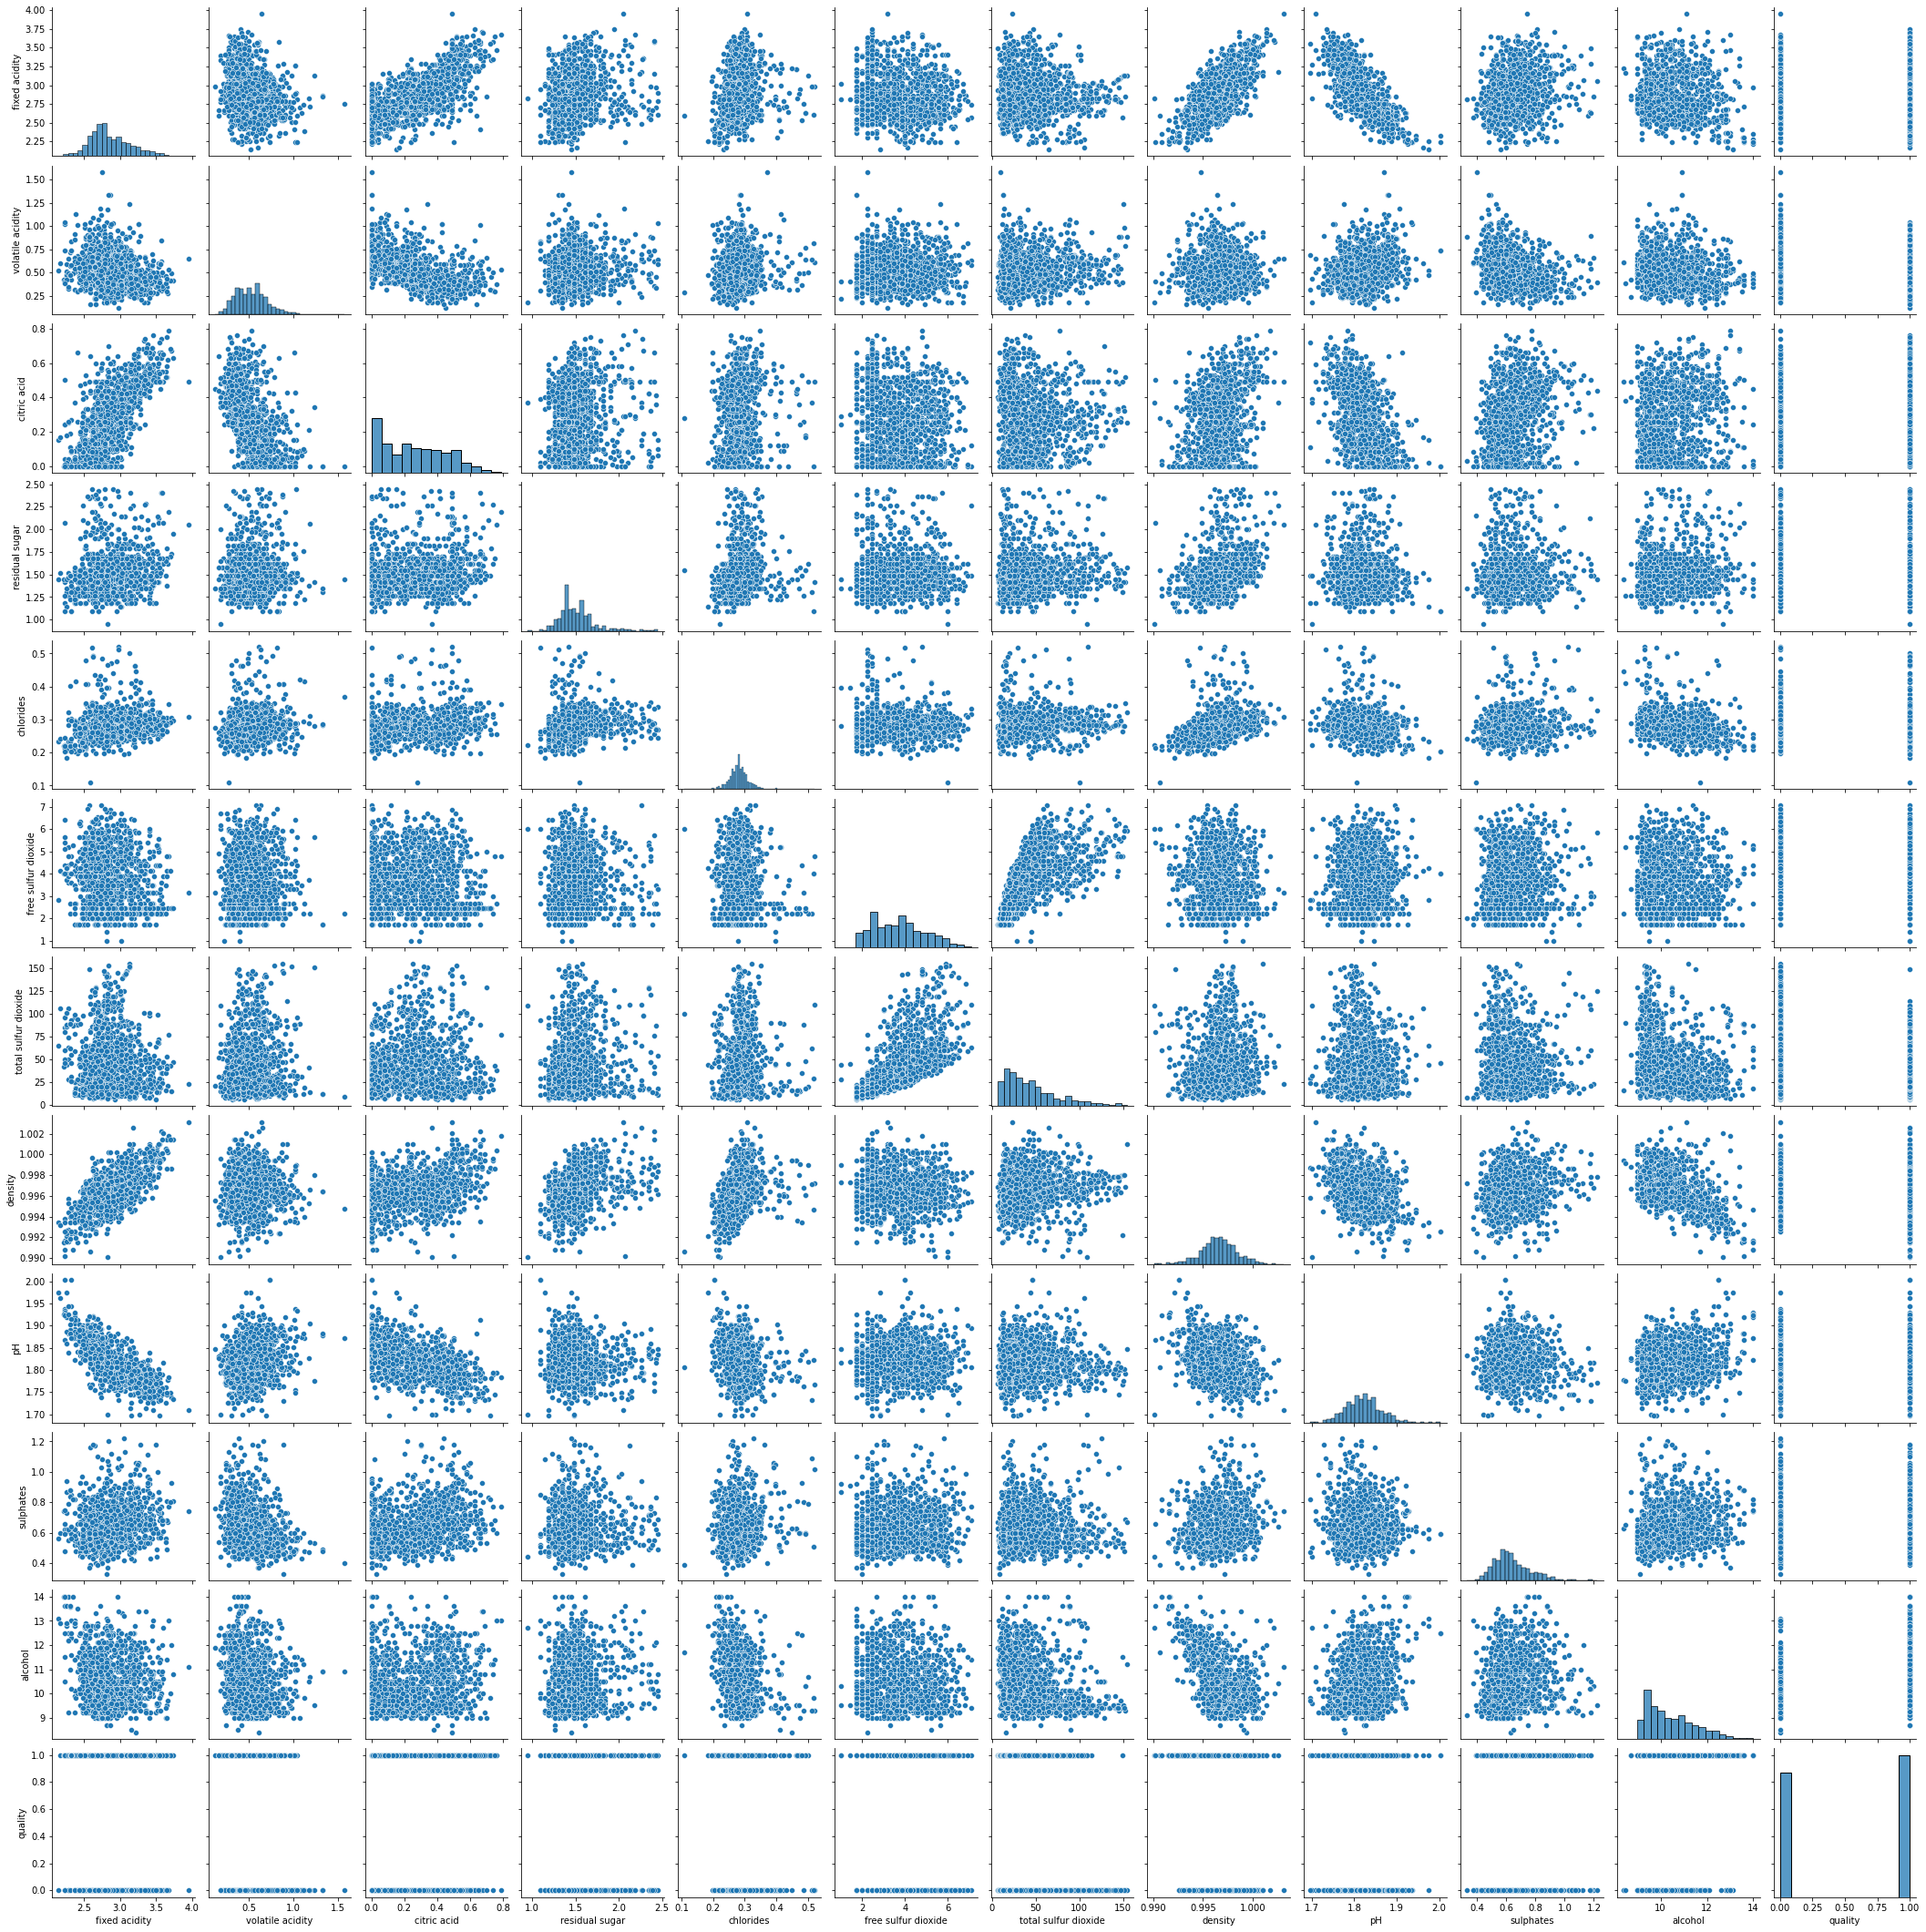

In [50]:
sns.pairplot(data=df)

Fixed Acidity is having Linear Corelation with Density

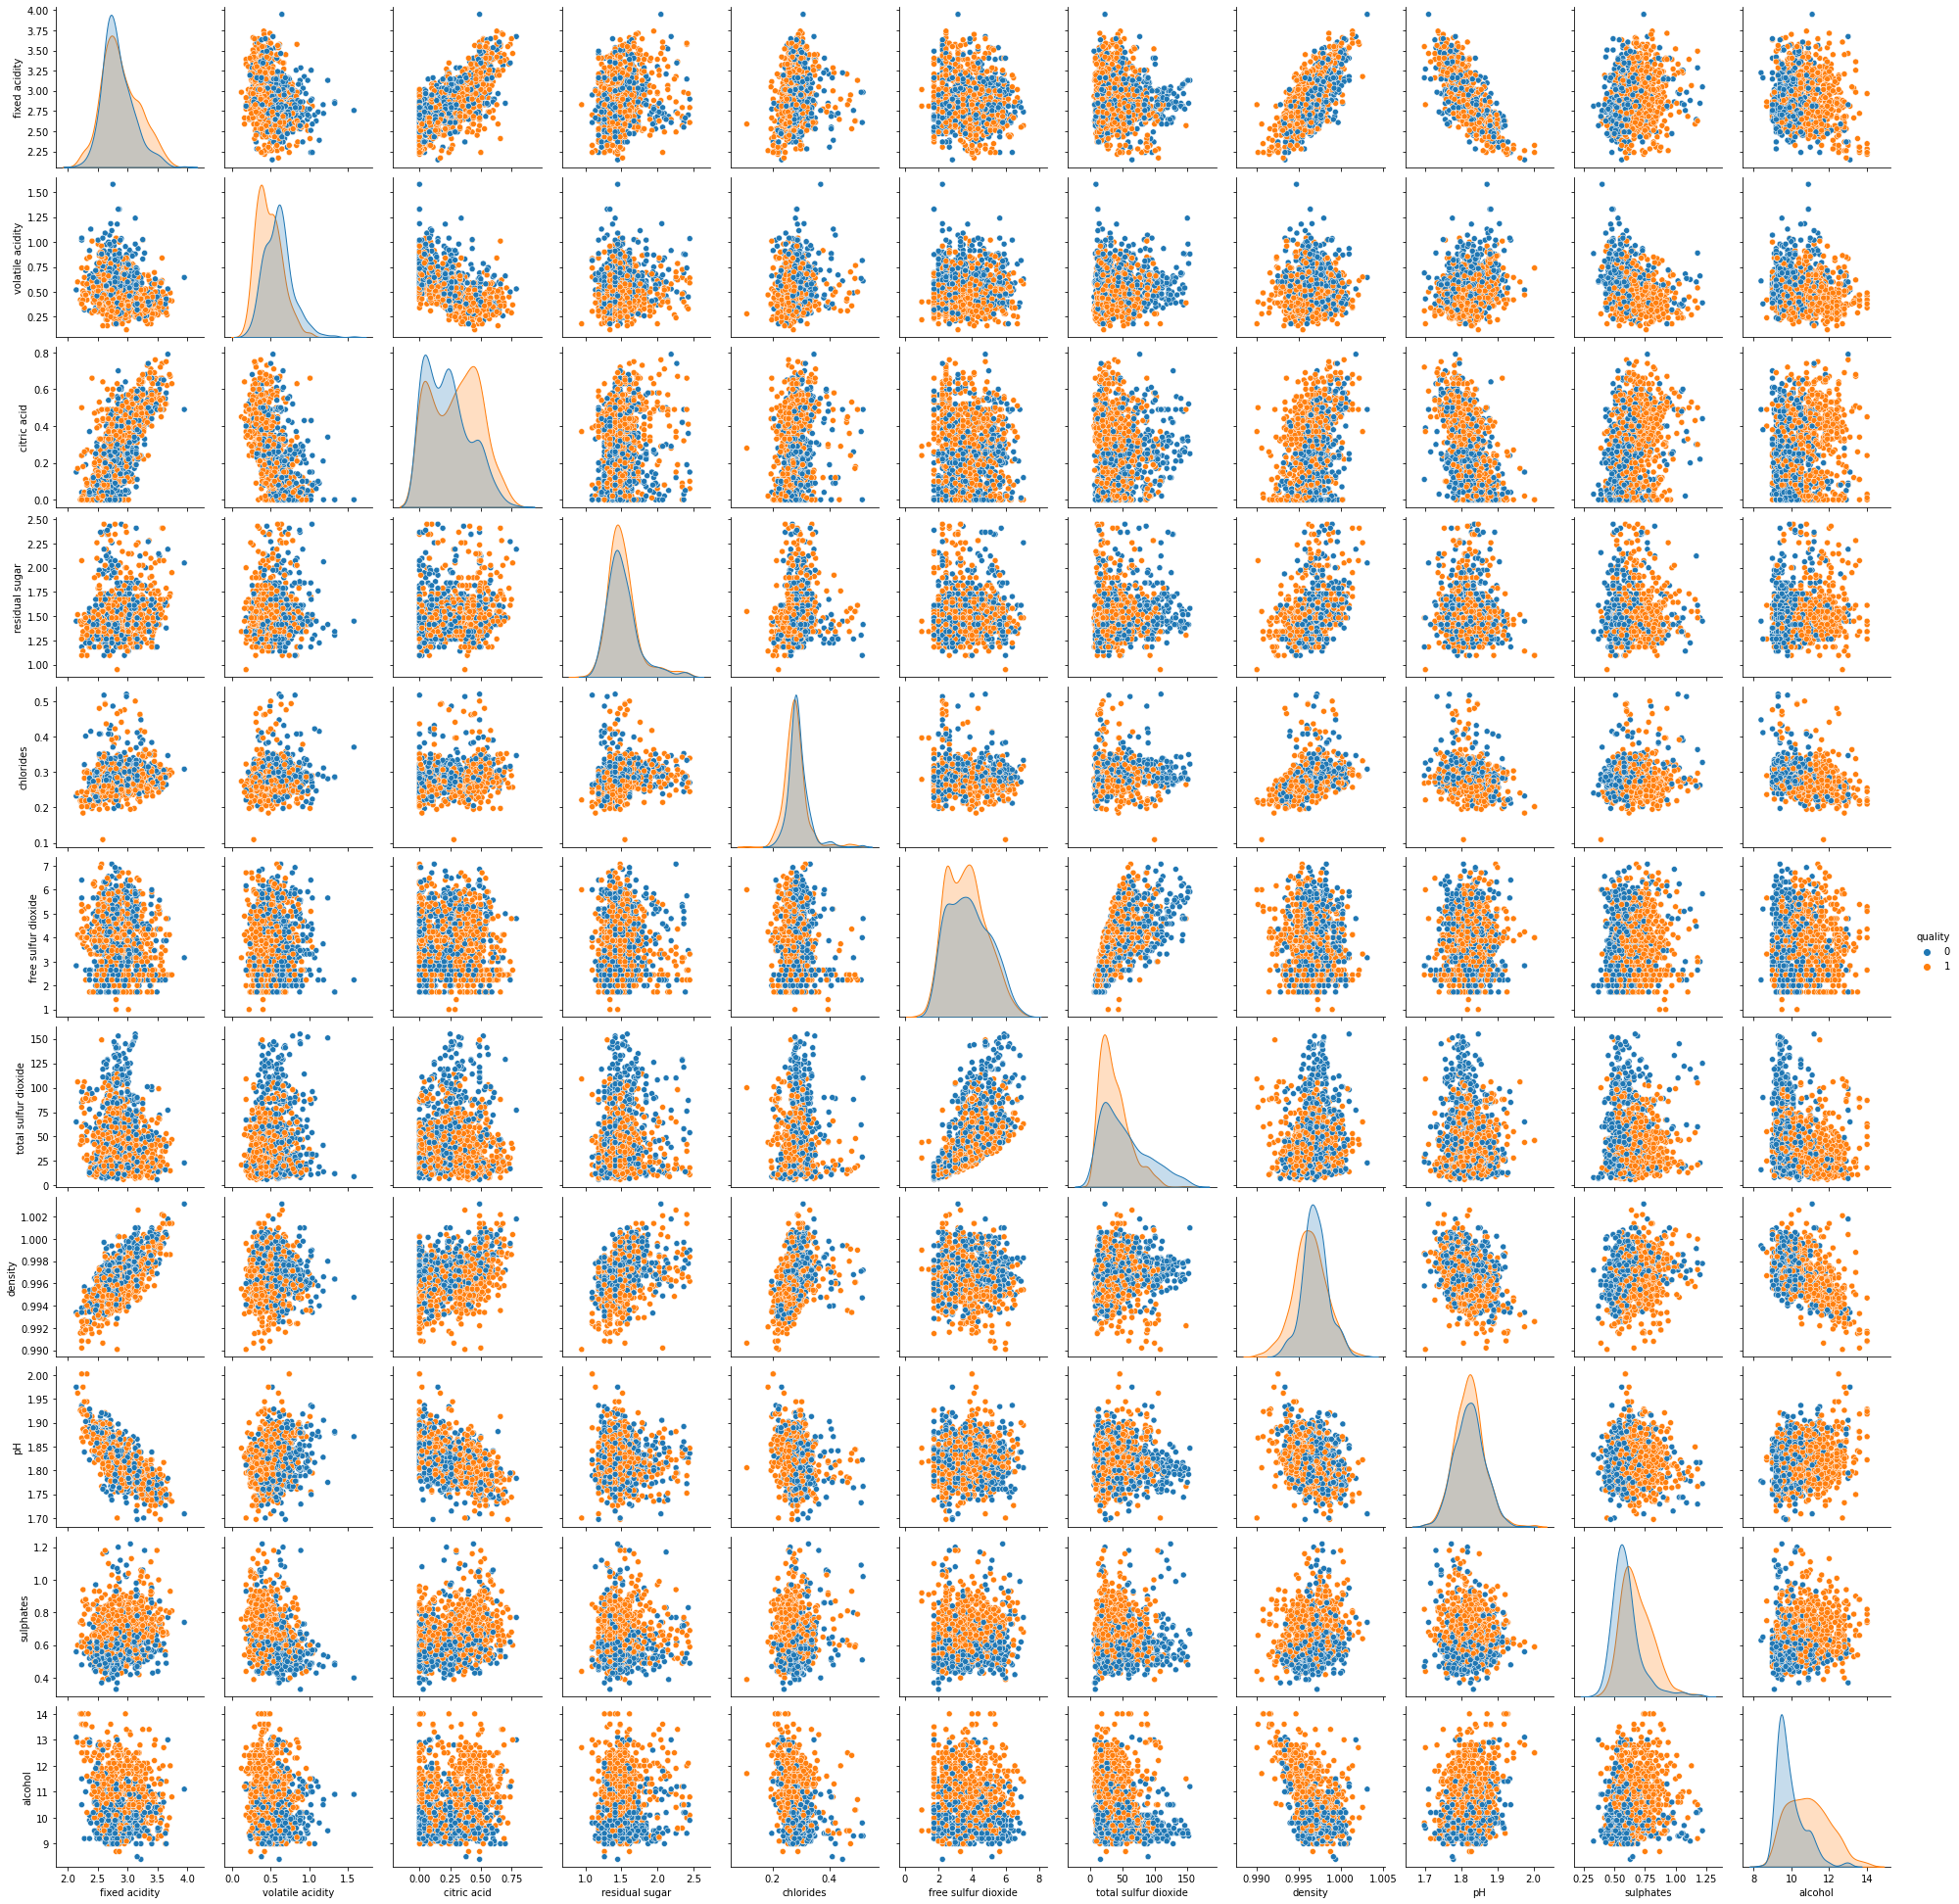

In [51]:
sns.pairplot(data=df, hue='quality')

Viewing each Attribute with respect to Quality

In [52]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [53]:
x

array([[ 2.7202941 ,  0.7       ,  0.        , ...,  1.8734994 ,
         0.56      ,  9.4       ],
       [ 2.79284801,  0.88      ,  0.        , ...,  1.78885438,
         0.68      ,  9.8       ],
       [ 2.79284801,  0.76      ,  0.04      , ...,  1.80554701,
         0.65      ,  9.8       ],
       ...,
       [ 2.42899156,  0.55      ,  0.1       , ...,  1.8761663 ,
         0.76      , 11.2       ],
       [ 2.42899156,  0.645     ,  0.12      , ...,  1.88944436,
         0.71      , 10.2       ],
       [ 2.44948974,  0.31      ,  0.47      , ...,  1.84119526,
         0.66      , 11.        ]])

In [54]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [55]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=42)

## Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

## Model Creation

In [57]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()

In [58]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    train_pred = model.predict(xtrain)
    test_pred =  model.predict(xtest)
    print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
    print("Test Accuracy: ",accuracy_score(ytest, test_pred))
    print("Confusion Matrix: \n",confusion_matrix(ytest,test_pred))
    print("Classification Report: \n",classification_report(ytest, test_pred))

In [59]:
mymodel(logreg)

Training Accuracy:  0.7536394176931691
Test Accuracy:  0.7213541666666666
Confusion Matrix: 
 [[122  46]
 [ 61 155]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       168
           1       0.77      0.72      0.74       216

    accuracy                           0.72       384
   macro avg       0.72      0.72      0.72       384
weighted avg       0.73      0.72      0.72       384



In [60]:
mymodel(knn)

Training Accuracy:  0.799552071668533
Test Accuracy:  0.7161458333333334
Confusion Matrix: 
 [[112  56]
 [ 53 163]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       168
           1       0.74      0.75      0.75       216

    accuracy                           0.72       384
   macro avg       0.71      0.71      0.71       384
weighted avg       0.72      0.72      0.72       384



In [61]:
mymodel(svm)

Training Accuracy:  0.8006718924972005
Test Accuracy:  0.7578125
Confusion Matrix: 
 [[134  34]
 [ 59 157]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       168
           1       0.82      0.73      0.77       216

    accuracy                           0.76       384
   macro avg       0.76      0.76      0.76       384
weighted avg       0.77      0.76      0.76       384



# Hyperparametric Tuning

In [62]:
logreg=LogisticRegression(solver='liblinear')

In [63]:
mymodel(logreg)

Training Accuracy:  0.7536394176931691
Test Accuracy:  0.7213541666666666
Confusion Matrix: 
 [[122  46]
 [ 61 155]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       168
           1       0.77      0.72      0.74       216

    accuracy                           0.72       384
   macro avg       0.72      0.72      0.72       384
weighted avg       0.73      0.72      0.72       384



In [64]:
accuracy=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

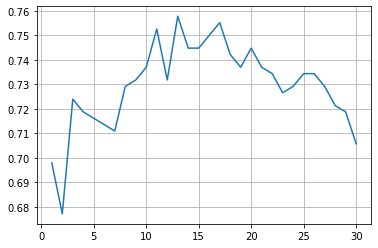

In [65]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

In [66]:
knn=KNeighborsClassifier(n_neighbors=13)

In [67]:
mymodel(knn)

Training Accuracy:  0.7693169092945129
Test Accuracy:  0.7578125
Confusion Matrix: 
 [[122  46]
 [ 47 169]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       168
           1       0.79      0.78      0.78       216

    accuracy                           0.76       384
   macro avg       0.75      0.75      0.75       384
weighted avg       0.76      0.76      0.76       384



In [68]:
svm=SVC(kernel='linear')

In [69]:
mymodel(svm)

Training Accuracy:  0.7536394176931691
Test Accuracy:  0.7265625
Confusion Matrix: 
 [[130  38]
 [ 67 149]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71       168
           1       0.80      0.69      0.74       216

    accuracy                           0.73       384
   macro avg       0.73      0.73      0.73       384
weighted avg       0.74      0.73      0.73       384



## Deployment

In [70]:
import pickle
pickle.dump(knn, open('wine_knn.pkl','wb'))

model = pickle.load(open('wine_knn.pkl','rb'))